In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df1 = pd.read_csv('./data/random_data.csv')
df2 = pd.read_csv('./data/random_data_2.csv')
df3 = pd.read_csv('./data/random_data_3.csv')

### För dessa tre dataset så ska följande frågor besvaras: 
### Saknas värden?
### Finns dubbletter?
### Finns extremvärden?
### Annat?
### Sedan så ska jag välja ut det dataset som jag finner mest lämplig att använda till min SVM analys

### Vi kan börja med att se hur många datapunkter och attribut alla dataset innehåller:

In [4]:
print(f"Det första datasetet har {df1.shape[0]}st datapunkter och {df1.shape[1]}st attribut")
print(f"Det andra datasetet har {df2.shape[0]}st datapunkter och {df2.shape[1]}st attribut")
print(f"Det tredje datasetet har {df3.shape[0]}st datapunkter och {df3.shape[1]}st attribut")

Det första datasetet har 1000st datapunkter och 3st attribut
Det andra datasetet har 1000st datapunkter och 3st attribut
Det tredje datasetet har 1000st datapunkter och 4st attribut


### Om vi sedan går till första frågan som ska besvaras, om värden saknas:

In [5]:
df1.isnull().sum()

feature_1    0
feature_2    0
target       0
dtype: int64

In [6]:
df2.isnull().sum()

feature_1    0
feature_2    0
target       0
dtype: int64

In [7]:
df3.isnull().sum()

Unnamed: 0     0
feature_1     50
feature_2     49
target         0
dtype: int64

### Vi ser att i det tredje datasetet så saknas det värden. 

### Vi går vidare till att kontrollera dubbletter: 

In [8]:
print(f'Dubbletter i det första datasetet: {df1.duplicated().sum()}')
print(f'Dubbletter i det andra datasetet: {df2.duplicated().sum()}')
print(f'Dubbletter i det tredje datasetet: {df3.duplicated().sum()}')

Dubbletter i det första datasetet: 0
Dubbletter i det andra datasetet: 500
Dubbletter i det tredje datasetet: 0


### Här ser vi att det andra datasetet har 500 dubbletter, alltså hälften av den totala mängden datapunkter.

### Nu till den sista frågan om det finns några extremvärden:

array([[<Axes: title={'center': 'feature_1'}>,
        <Axes: title={'center': 'feature_2'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

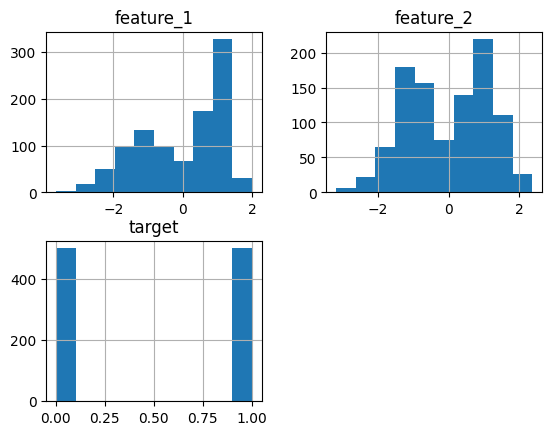

In [9]:
df1.hist()

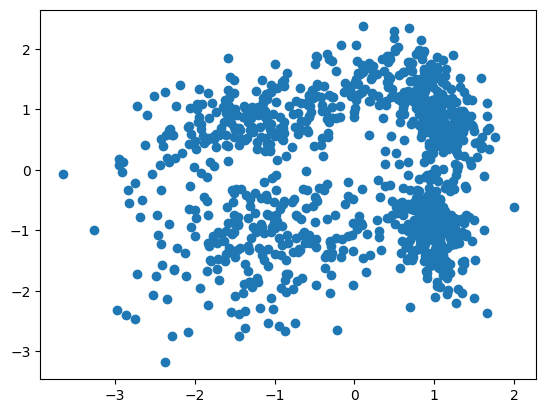

In [10]:
plt.scatter(df1['feature_1'],df1['feature_2'])

array([[<Axes: title={'center': 'feature_1'}>,
        <Axes: title={'center': 'feature_2'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

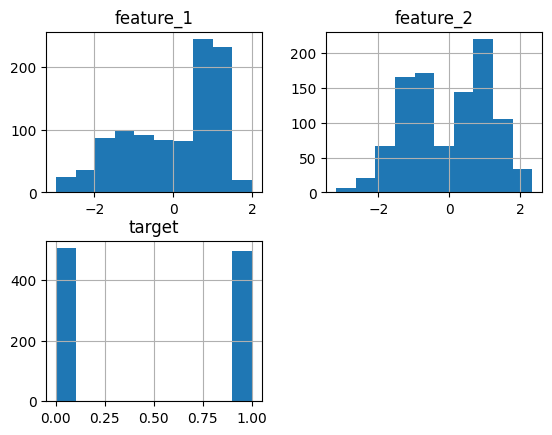

In [11]:
df2.hist()

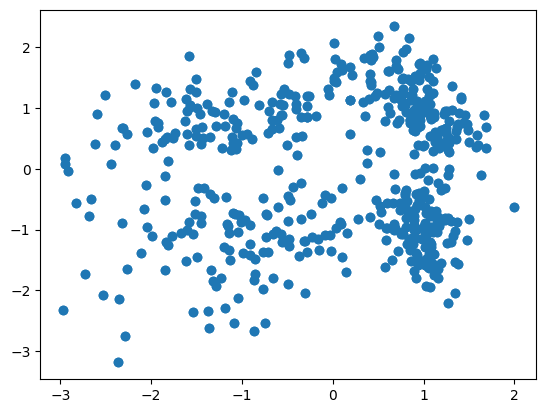

In [12]:
plt.scatter(df2['feature_1'],df2['feature_2'])

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'feature_1'}>],
       [<Axes: title={'center': 'feature_2'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

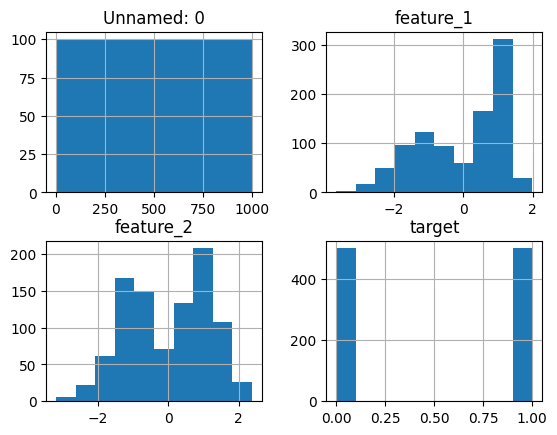

In [13]:
df3.hist()

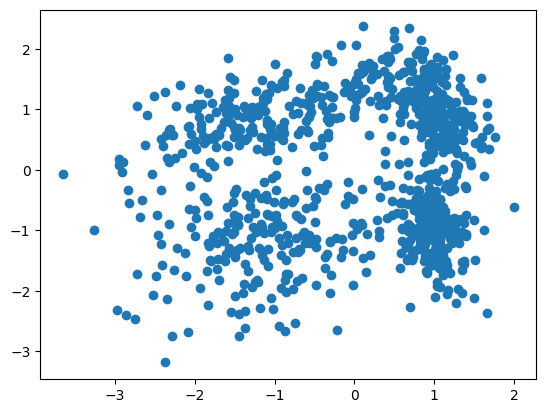

In [14]:
plt.scatter(df3['feature_1'],df3['feature_2'])

### Efter att ha ritat ut histogram och scatter plots för samtliga så tycker jag inte att det finns några direkta extremvärden, men jag tycker att det andra datasetet har jämnast värden då den inte har två stycken värden på x-axeln som går under -3 som både första och andra datasetet har.
### Men eftersom att det tredje datasetet saknar en del värden och det andra datasetet har 500st dubbletter så kommer jag gå vidare med det första datasetet i min analys.

### Nästa del så ska jag rita ut all data med klasserna i olika färger och svara på följande fråga:
### Ser det ut som att det är möjligt att skapa en bra klassificering?

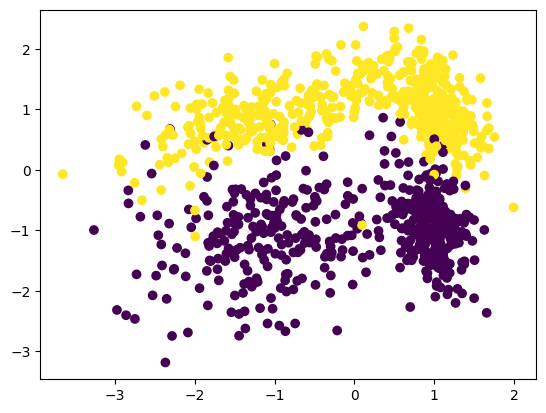

In [15]:
plt.scatter(df1['feature_1'],df1['feature_2'], c=df1['target'])

### Efter att ha ritat ut datan så ser man en klar och tydlig bild av två klassificeringar, det är några punkter som hamnar över på den andras sida dock.

### Nu ska vi träna en SVM modell och se vad den får för testscore, sedan så ska vi rita ut den med hyperplanet.
### Rekommendationen är att använda linjär kernel när vi ska rita ut datan, men det uppskattas att träna och se olika score med olika kernels.

In [45]:
x = df1.drop(columns=['target'])
y  = df1['target']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
linear_svc=svm.SVC(kernel='linear')
linear_svc.fit(x_train,y_train)
y_pred_linear=linear_svc.predict(x_test)

In [19]:
svc=svm.SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred_poly=svc.predict(x_test)

In [20]:
rbf_svc=svm.SVC(kernel='rbf')
rbf_svc.fit(x_train,y_train)
y_pred_rbf=rbf_svc.predict(x_test)

In [21]:
svc=svm.SVC(kernel='sigmoid')
svc.fit(x_train,y_train)
y_pred_sigmoid=svc.predict(x_test)

In [53]:
print(f'Accuracy Score for linear kernel: {accuracy_score(y_test,y_pred_linear)}')
print(f'Accuracy Score for poly kernel: {accuracy_score(y_test,y_pred_poly)}')
print(f'Accuracy Score for rbf kernel: {accuracy_score(y_test,y_pred_rbf)}')
print(f'Accuracy Score for sigmoid kernel: {accuracy_score(y_test,y_pred_sigmoid)}')

Accuracy Score for linear kernel: 0.985
Accuracy Score for poly kernel: 0.455
Accuracy Score for rbf kernel: 0.445
Accuracy Score for sigmoid kernel: 0.455


In [23]:
def svc_plot(model):
    
    # Get the current axes submap data and prepare for drawing the split line
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Draw a dividing line using the outline method
    ax.contour(X, Y, P, colors='green', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    
    # Mark the location of the support vector
    # ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], c='green', s=10)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


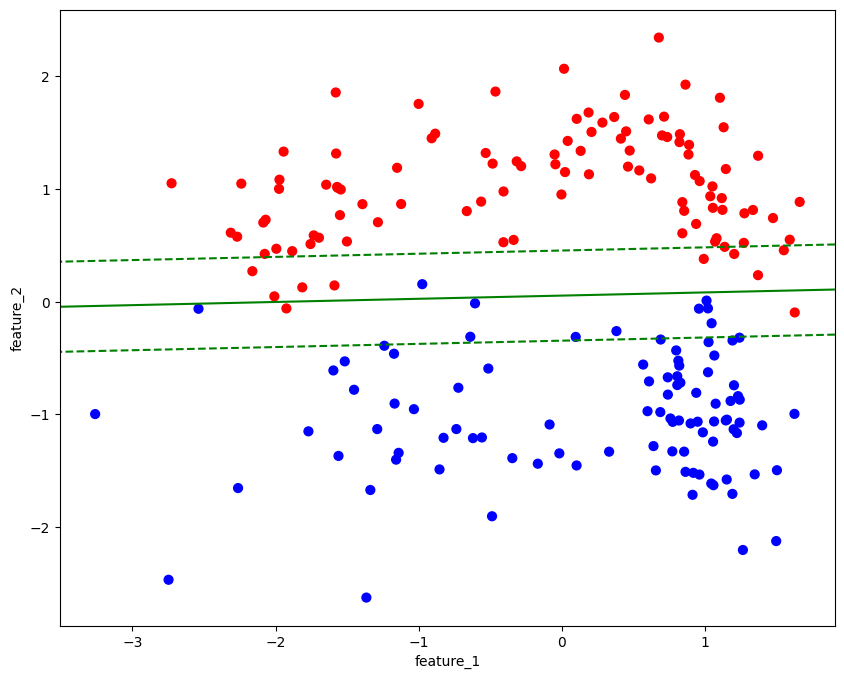

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test['feature_1'], x_test['feature_2'], c=y_test, s=40, cmap='bwr')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
svc_plot(linear_svc)

c:\Programmering\MachineLearning-SchoolProjects\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


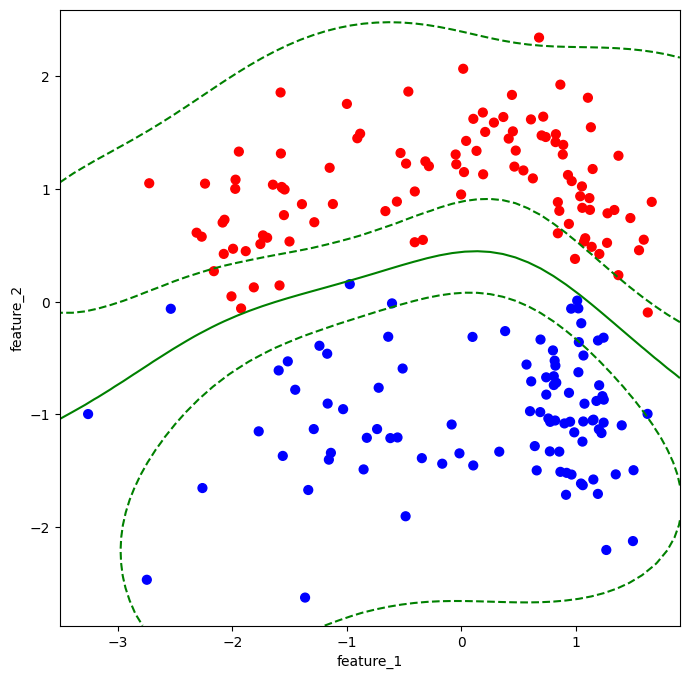

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(x_test['feature_1'], x_test['feature_2'], c=y_test, s=40, cmap='bwr')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
svc_plot(rbf_svc)

### Eftersom att RBF kernel fick bäst resultat så bestämde jag mig för att rita ut även den. Man kan även lägga in c=y_predict istället för y_test men jag fann att se vart den gör fel var ganska lärorikt så jag lät det vara såhär.
### Eftersom att hyperparametern i RBF är följdsam mot datan så kan ju den enklare ringa in datan som vi ser ovan, den har enbart en miss och det är en som sticker över på andra sidan.

# VG

In [26]:
df3d = pd.read_csv('./data/random_data_3d.csv')

In [27]:
print(f"Datasetet har {df3d.shape[0]}st datapunkter och {df3d.shape[1]}st attribut")

Datasetet har 1000st datapunkter och 4st attribut


In [28]:
df3d.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
target       0
dtype: int64

In [29]:
print(f'Dubbletter i datasetet: {df3d.duplicated().sum()}')

Dubbletter i datasetet: 0


array([[<Axes: title={'center': 'feature_1'}>,
        <Axes: title={'center': 'feature_2'}>],
       [<Axes: title={'center': 'feature_3'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

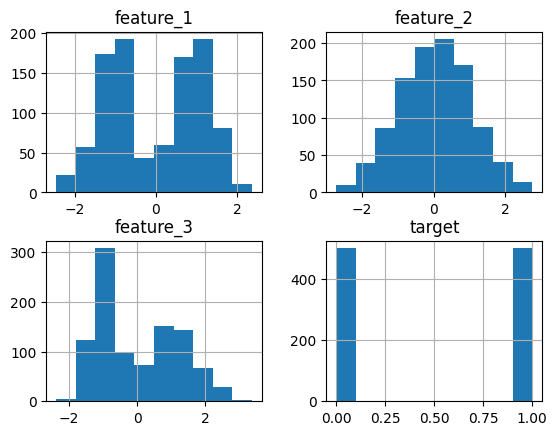

In [30]:
df3d.hist()

### För att nu besvara samma frågeställning som i G-delen:
### Det saknas inga värden och inte heller finns det några dubbletter.
### Det finns inte heller något extremvärde som sticker iväg rejält

In [31]:
x = df3d.drop(columns=['target'])
y  = df3d['target']

In [32]:
from mpl_toolkits import mplot3d

In [33]:
X = x['feature_1']
Y = x['feature_2']
Z = x['feature_3']

In [34]:
colors = np.where(y == 1, 'green', 'blue')

C:\Users\Nicla\AppData\Local\Temp\ipykernel_13532\1655922893.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X,Y,Z,c=colors, cmap='hsv')


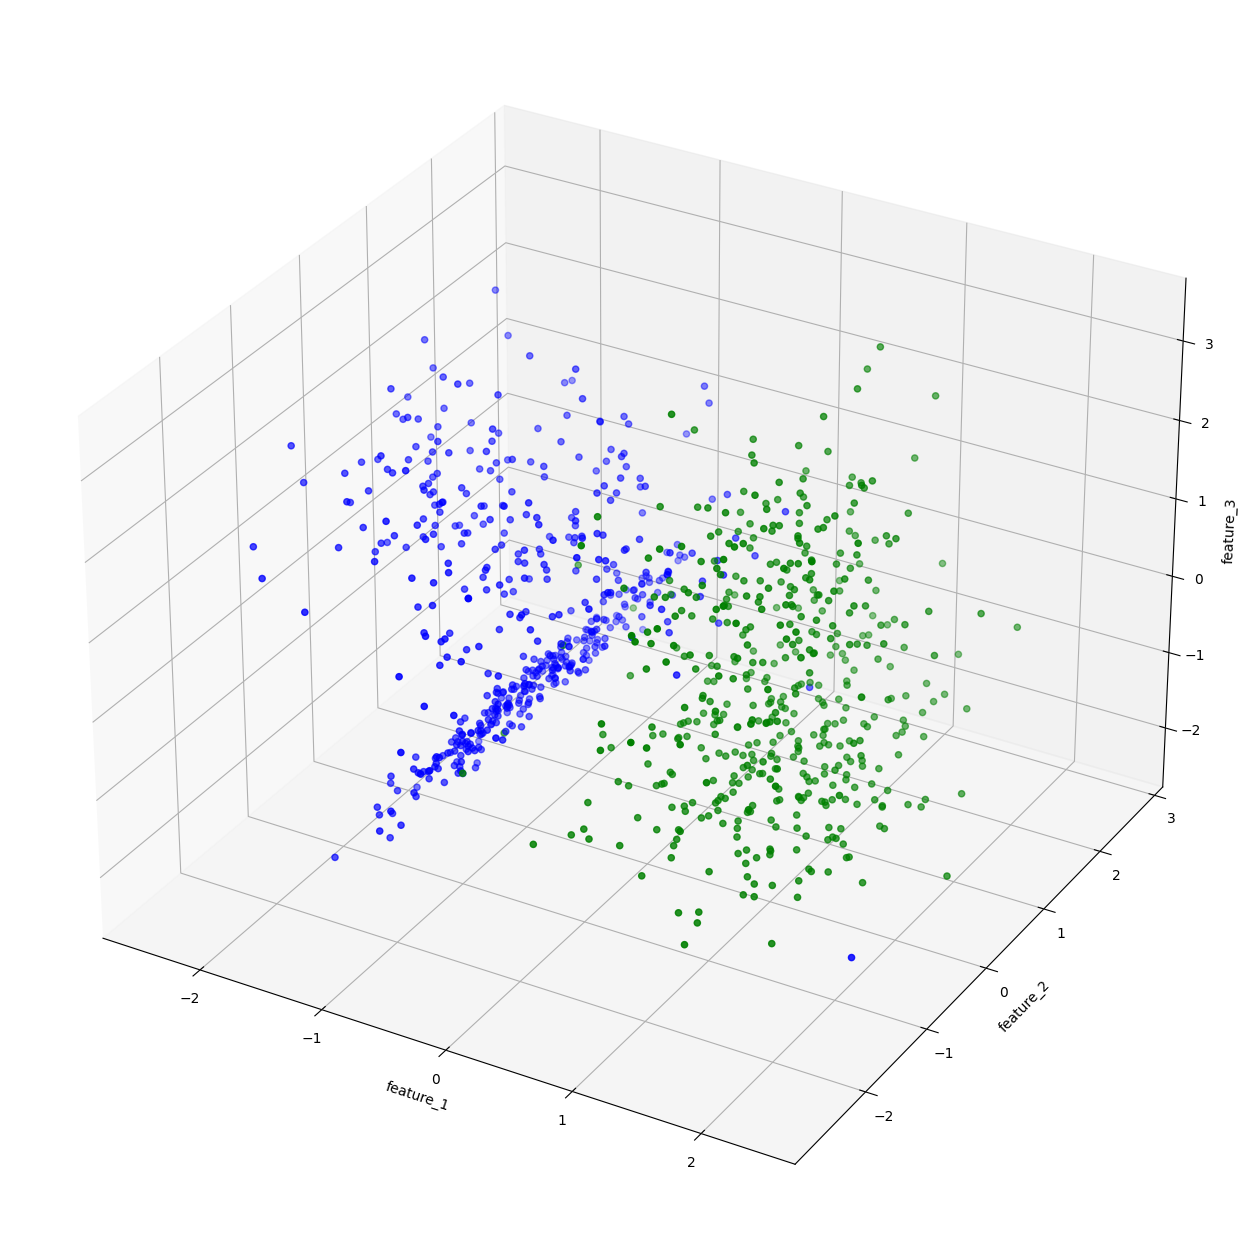

In [35]:
fig = plt.figure(figsize=(16,16))
ax  = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z,c=colors, cmap='hsv')
# ax.view_init(0, -86)
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('feature_3')
plt.show()

### Nästan precis som i G delen så tycker jag att man kan se en väldigt tydlig fördelning av data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
linear_svc=svm.SVC(kernel='linear')
linear_svc.fit(x_train,y_train)
y_pred_linear=linear_svc.predict(x_test)

In [38]:
poly_svc=svm.SVC(kernel='poly')
poly_svc.fit(x_train,y_train)
y_pred_poly=poly_svc.predict(x_test)

In [39]:
rbf_svc=svm.SVC(kernel='rbf')
rbf_svc.fit(x_train,y_train)
y_pred_rbf=rbf_svc.predict(x_test)

In [40]:
sig_svc=svm.SVC(kernel='sigmoid')
sig_svc.fit(x_train,y_train)
y_pred_sigmoid=sig_svc.predict(x_test)

In [41]:
print(f'Accuracy Score for linear kernel: {accuracy_score(y_test,y_pred_linear)}')
print(f'Accuracy Score for poly kernel: {accuracy_score(y_test,y_pred_poly)}')
print(f'Accuracy Score for rbf kernel: {accuracy_score(y_test,y_pred_rbf)}')
print(f'Accuracy Score for sigmoid kernel: {accuracy_score(y_test,y_pred_sigmoid)}')

Accuracy Score for linear kernel: 0.975
Accuracy Score for poly kernel: 0.97
Accuracy Score for rbf kernel: 0.98
Accuracy Score for sigmoid kernel: 0.92


In [42]:
w = linear_svc.coef_[0]
b = linear_svc.intercept_
xx, yy = np.meshgrid(np.linspace(x_test['feature_1'].min(), x_test['feature_1'].max(), 10), 
                     np.linspace(x_test['feature_2'].min(), x_test['feature_2'].max(), 10))
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

In [43]:
colors = np.where(y_test == 1, 'green', 'blue')

C:\Users\Nicla\AppData\Local\Temp\ipykernel_13532\84321410.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(x_test['feature_1'], x_test['feature_2'], x_test['feature_3'], c=colors, cmap='hsv')


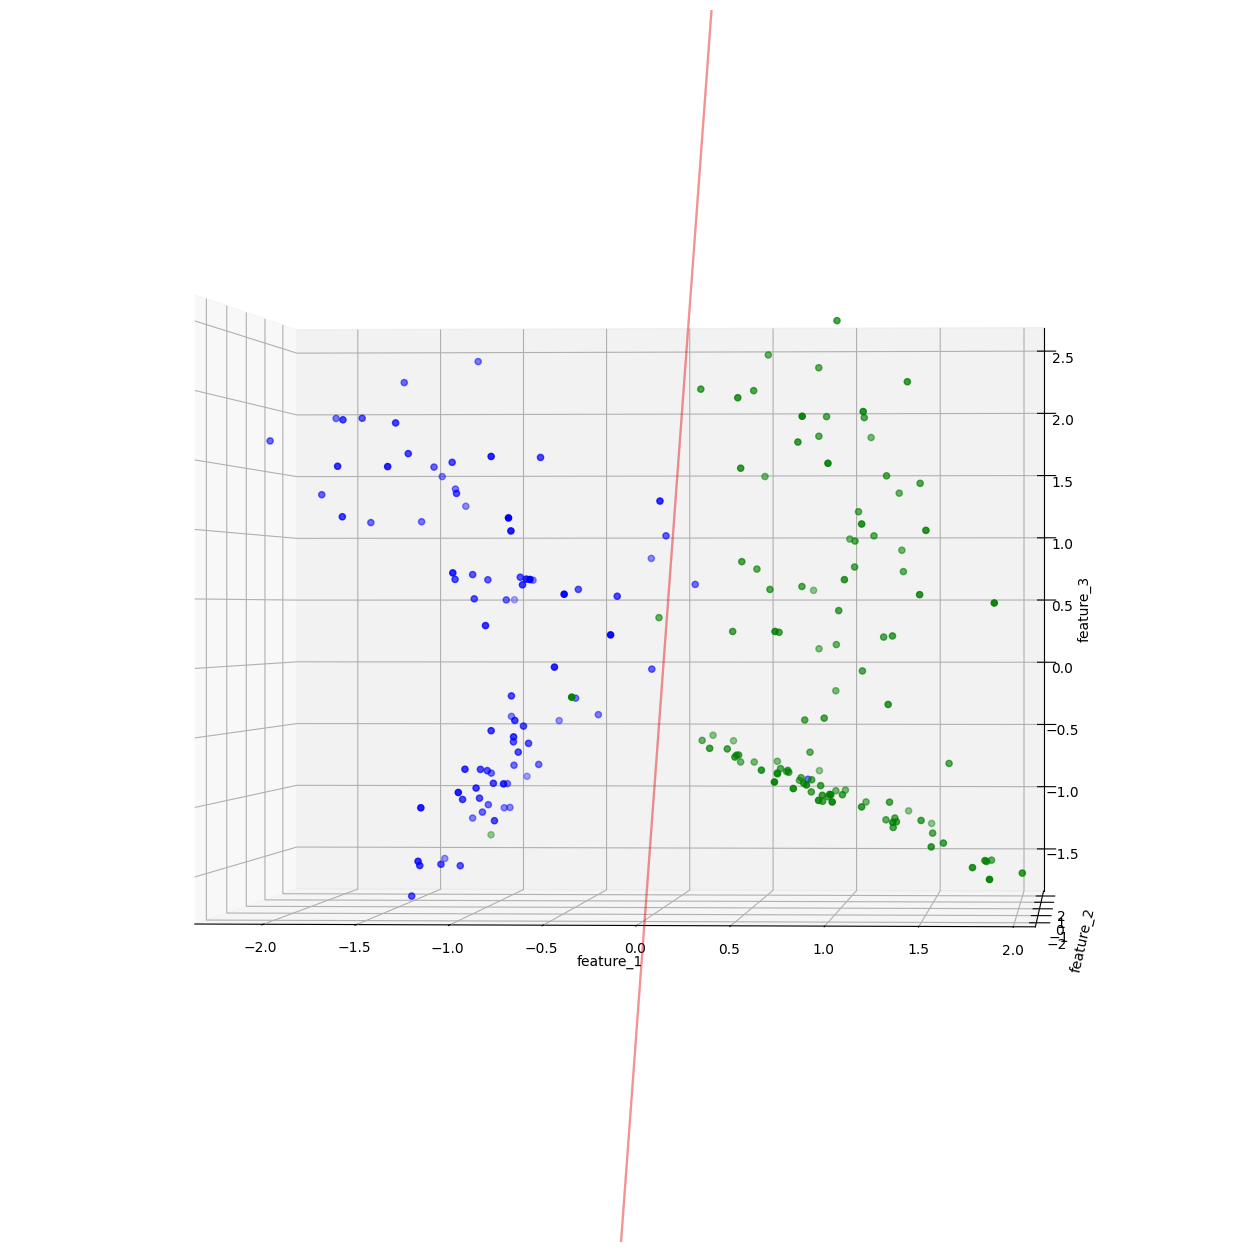

In [44]:
fig = plt.figure(figsize=(16,16))
ax  = plt.axes(projection='3d')
ax.scatter3D(x_test['feature_1'], x_test['feature_2'], x_test['feature_3'], c=colors, cmap='hsv')
ax.plot_surface(xx, yy, zz, alpha=0.5, color='red')
ax.view_init(0, -86)
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('feature_3')
ax.set_xlim(x_test['feature_1'].min(), x_test['feature_1'].max())
ax.set_ylim(x_test['feature_2'].min(), x_test['feature_2'].max())
ax.set_zlim(x_test['feature_3'].min(), x_test['feature_3'].max())
plt.show()

### Efter att ha observerat med olika test/träningsdata samt olika vinklar som vi ser grafen har jag kommit fram till följande:
### Eftersom att hyperplanet vill klassificera så bra som möjligt så beroende på datan man tränar den med så kommer den att ändra vinkel, jag fann att det enklaste sättet att sedan se hur den har delat in datan var att vinkla grafen på ett sådant sätt att man ser hyperplanet helt från sidan så det bara är ett streck och då blir det väldigt tydligt vilka punkter som ska höra till vad, precis som i G så väljer jag även här att sätta färgerna till y_test istället för y_predict för att då ser jag vilka punkter som det är fel klassificering på.
### Det var svårt att komma fram till hur man skulle få fram hyperplanet, och när jag väl kom fram till det så finner jag inget sätt att korta ner den, så jag väljer istället att begränsa axlarna till datan som är i dom istället och då blev det betydligt enklare att se datan på ett bättre sätt.
### En till observation som jag tänkte på angående extremvärden var att nu när jag väl ritar ut det i 3d så ser man ju väldigt tydligt när det är punkter från samma klassificering som sticker iväg, min tidigare observation när man ser på histogram så delar jag inte in det i klassificeringar utan kollar på hela datasetet.